In [2]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
from scipy.io import loadmat
import pickle

load predicted and observed cycle lives

In [8]:
def load_cycle_lives_pred(dataset, model_name, data_ids, cycle_lives_pred_list):
    for data_id in data_ids:
        file_path = "End to End Framework/All cycle lives/" + dataset + "/" + model_name + "/dataset_" + str(data_id) + ".csv"
        cycle_lives_pred = np.genfromtxt(file_path, dtype="float")[:, 1]
        cycle_lives_pred_list.append(cycle_lives_pred)

def load_cycle_lives_obs(dataset, model_name, data_ids, cycle_lives_obs_list):
    for data_id in data_ids:
        file_path = "End to End Framework/All cycle lives/" + dataset + "/" + model_name + "/dataset_" + str(data_id) + ".csv"
        cycle_lives_obs = np.genfromtxt(file_path, dtype="float")[:, 0]
        cycle_lives_obs_list.append(cycle_lives_obs)

In [144]:
cyclelives_E2E_Elastic_discharge = []
cyclelives_E2E_Elastic_deltaQ = []
cyclelives_E2E_ENN_discharge = []
cyclelives_E2E_ENN_deltaQ = []
load_cycle_lives_pred("169 LFP", "E2E-Elastic-discharge", range(4), cyclelives_E2E_Elastic_discharge)
load_cycle_lives_pred("169 LFP", "E2E-Elastic-deltaQ", range(4), cyclelives_E2E_Elastic_deltaQ)
load_cycle_lives_pred("169 LFP", "E2E-ENN-discharge", range(4), cyclelives_E2E_ENN_discharge)
load_cycle_lives_pred("169 LFP", "E2E-ENN-deltaQ", range(4), cyclelives_E2E_ENN_deltaQ)
cyclelives_elasticnet_discharge = loadmat('dataset/169 LFP/cyclelives_elasticnet_discharge.mat')
cyclelives_end_to_end_delta_Q = loadmat('dataset/169 LFP/cyclelives_end_to_end_delta_Q.mat')

In [15]:
cyclelives_E2E_Elastic_discharge = []
cyclelives_E2E_Elastic_deltaQ = []
cyclelives_E2E_ENN_discharge = []
cyclelives_E2E_ENN_deltaQ = []
cycleLives = []
load_cycle_lives_pred("48 NMC", "E2E-ENN-discharge", range(2), cyclelives_E2E_ENN_discharge)
load_cycle_lives_pred("48 NMC", "E2E-ENN-deltaQ", range(2), cyclelives_E2E_ENN_deltaQ)
load_cycle_lives_obs("48 NMC", "E2E-ENN-discharge", range(2), cycleLives)


In [153]:
outputData = loadmat('dataset/169 LFP/Cycle_output_6_28_100_points.mat')
cellsTrain = np.squeeze(outputData['cells_train'])-1
cellsTest1 = np.squeeze(outputData['cells_test1'])-1
cellsTest2 = np.squeeze(outputData['cells_test2'])-1
cellsTest3 = np.squeeze(outputData['cells_test3'])-1
cycleLives = outputData['cycle_lives']
initialCapacity = outputData['Initial_capacity']

load actual cycle lives

In [154]:
raw_data_path = "dataset/" + "169 LFP"
precision = "float"
cycle_lives_train = np.genfromtxt(raw_data_path + '/cycle_lives/train_cycle_lives.csv',
                                          delimiter=',', dtype=precision)
cycle_lives_test1 = np.genfromtxt(raw_data_path + '/cycle_lives/test1_cycle_lives.csv',
                                  delimiter=',', dtype=precision)
cycle_lives_test2 = np.genfromtxt(raw_data_path + '/cycle_lives/test2_cycle_lives.csv',
                                  delimiter=',', dtype=precision)
cycle_lives_test3 = np.genfromtxt(raw_data_path + '/cycle_lives/test3_cycle_lives.csv',
                                  delimiter=',', dtype=precision)
cycleLives = [cycle_lives_train, cycle_lives_test1, cycle_lives_test2, cycle_lives_test3]

In [155]:
f = open('dataset/169 LFP/cyclelives_elasticnet_deltaQ.pkl', 'rb')
cyclelives_elasticnet_deltaQ = pickle.load(f)

Set plotting settings:

In [11]:
fig_width = 7/3 # ECS spec is 3.25" width
fig_width_3col = 7
fig_height = 1 * fig_width # standard ratio
fontSize = 9
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams['mathtext.fontset'] = 'cm'
rcParams['mathtext.rm'] = 'Arial'
plt.rcParams["legend.loc"] = 'lower left'
fontdict = {'fontsize': fontSize,
 'horizontalalignment': 'left'}
rcParams['figure.autolayout'] = True
rcParams['lines.markersize'] = 5
rcParams['lines.linewidth'] = 1.0
rcParams['font.size'] = fontSize
rcParams['legend.fontsize'] = fontSize
rcParams['legend.frameon'] = False
rcParams['xtick.minor.visible'] = True
rcParams['ytick.minor.visible'] = True
# rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams["legend.loc"] = 'lower left'

rcParams['pdf.fonttype'] = 42

rcParams['ps.fonttype'] = 42
sz = 15

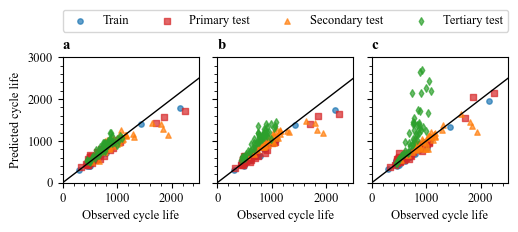

In [176]:
fig, axes = plt.subplots(figsize=(1.75*3, 2.1), nrows = 1, ncols = 3, sharey='all', sharex='all')
axes = axes.ravel()

for k in np.arange(3):
    axes[k].set_title(chr(97+k), loc='left', weight='bold')
    axes[k].set_xlim([0, 2500])
    axes[k].set_ylim([0, 3000])
    if k == 0:
        axes[k].set_ylabel('Predicted cycle life')
    axes[k].set_xlabel('Observed cycle life')
    axes[k].plot(np.array([0, 2500]), np.array([0, 2500]), color='black')
    axes[k].set_xticks(np.linspace(0,2000,3), minor=False)
    axes[k].set_yticks(np.linspace(0,3000,4), minor=False)
    # axs[0].tick_params(axis='both', labelsize=9)
    # axs[1].tick_params(axis='both', labelsize=9)
    # box = axes[k].get_position()
    # axes[k].set_position([box.x0, box.y0 + box.height * 0.2,
    #                 box.width, box.height * 0.8])

markers = ['o', 's', '^', 'd']
colors = ['tab:blue', 'tab:red', 'tab:orange', 'tab:green']
labels = ['Train', 'Primary test', 'Secondary test', 'Tertiary test']
datasetKeys = ['cycle_lives_train_es', 'cycle_lives_test1_es', 'cycle_lives_test2_es', 'cycle_lives_test3_es']
cellsKeys = [cellsTrain, cellsTest1, cellsTest2, cellsTest3]
for i in range(len(datasetKeys)):
    axes[0].scatter(cycleLives[i], cyclelives_end_to_end_delta_Q[datasetKeys[i]], s=sz, marker=markers[i], color=colors[i], label=labels[i], alpha=0.7)
    axes[1].scatter(cycleLives[i], cyclelives_elasticnet_deltaQ[datasetKeys[i]], s=sz, marker=markers[i], color=colors[i], label=labels[i], alpha=0.7)
    axes[2].scatter(cycleLives[i], cyclelives_elasticnet_discharge[datasetKeys[i]], s=sz, marker=markers[i], color=colors[i], label=labels[i], alpha=0.7)


lines = []
labels = []
for ax in fig.axes:
    axLine, axLabel = ax.get_legend_handles_labels()
    lines.extend(axLine)
    labels.extend(axLabel)
    break

# fig.legend(lines, labels, loc = 'lower center')

# fig.legend(lines, labels, loc='lower center', bbox_to_anchor = (0.5, 1.2),
#            fancybox=True, shadow=True, ncol=4)

fig.legend(lines, labels, bbox_to_anchor=(0.55, 0.94),loc = 'lower center', ncol=4, frameon=True)
# fig.subplots_adjust(bottom=0.25)

# fig.subplots_adjust(bottom=-0.2)
# ax[2].legend(list(transforms.keys()))

# # Annotations
# ax[3].text(0.05, 0.9,
#            f'Slope minimized at {voltage_of_min_slope:.3f} V',
#            color='k', ha='left', transform=ax[3].transAxes)
# ax[5].text(0.05, 0.9,
#            f'Slope minimized at {voltage_of_min_slope_over_std_dev:.3f} V',
#            color='k', ha='left', transform=ax[5].transAxes)

# plt.tight_layout()
# plt.savefig(figpath / 'fig7_single_point_prediction.eps', format='eps')


# plt.rcParams["legend.loc"] = 'upper left'
# fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(5,4))
# axs.scatter(cycleLives[cellsTest1,0], cycleLifeTest1_pre, s=36, marker='s', color='tab:blue', label='Primary test')
# axs.scatter(cycleLives[cellsTest2,0], cycleLifeTest2_pre, s=45, marker='^', color='tab:orange', label='Secondary test')
# axs.scatter(cycleLives[cellsTest3,0], cycleLifeTest3_pre, s=45, marker='d', color='tab:red', label='Tertiary test')
# axs.plot(np.array([0, 2500]), np.array([0, 2500]), color='black')
# # axs.set_xlim([0, 2500])
# # axs.set_ylim([0, 2500])
# axs.grid()
# axs.set_xlabel('Observed cycle life at 80% nominal capacity', fontsize=14)
# axs.set_ylabel('Predicted cycle life', fontsize=14)
# axs.tick_params(axis='both', labelsize=14)
# axs.legend(fontsize=14)
fig.tight_layout(rect=[0, 0.01, 1, 0.99])
plt.show()

In [177]:
fig.savefig("cycle_lives_e2e_sota.png", dpi=1000, bbox_inches='tight')

plot the predicted cycle lives for
E2E-Elastic-discharge
E2E-Elastic-deltaQ
E2E-ENN-discharge
E2E-ENN-deltaQ


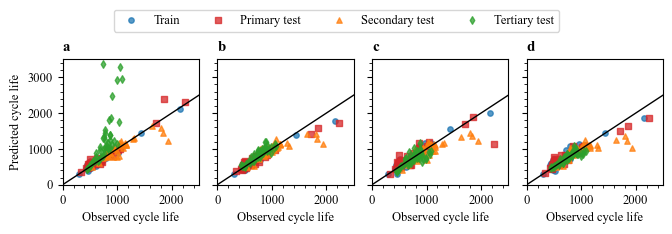

In [169]:
fig, axes = plt.subplots(figsize=(1.7*4, 2.1), sharex="all", sharey="all", nrows = 1, ncols = 4)
axes = axes.ravel()
for k in np.arange(4):
    axes[k].set_title(chr(97+k), loc='left', weight='bold')
    axes[k].set_xlim([0, 2500])
    axes[k].set_ylim([0, 3500])
    if k == 0:
        axes[k].set_ylabel('Predicted cycle life')
    axes[k].set_xlabel('Observed cycle life')
    axes[k].plot(np.array([0, 2500]), np.array([0, 2500]), color='black')
    axes[k].set_xticks(np.linspace(0,2000,3), minor=False)
    axes[k].set_yticks(np.linspace(0,3000,4), minor=False)
    # axs[0].tick_params(axis='both', labelsize=9)
    # axs[1].tick_params(axis='both', labelsize=9)
    # box = axes[k].get_position()
    # axes[k].set_position([box.x0, box.y0 + box.height * 0.2,
    #                 box.width, box.height * 0.8])

markers = ['o', 's', '^', 'd']
colors = ['tab:blue', 'tab:red', 'tab:orange', 'tab:green']
labels = ['Train', 'Primary test', 'Secondary test', 'Tertiary test']
datasetKeys = ['cycle_lives_train_es', 'cycle_lives_test1_es', 'cycle_lives_test2_es', 'cycle_lives_test3_es']
for i in range(4):
    axes[0].scatter(cycleLives[i], cyclelives_E2E_Elastic_discharge[i], s=sz, marker=markers[i],
                    color=colors[i], label=labels[i], alpha=0.75)
    axes[1].scatter(cycleLives[i], cyclelives_E2E_Elastic_deltaQ[i], s=sz, marker=markers[i],
                    color=colors[i], label=labels[i], alpha=0.75)
    axes[2].scatter(cycleLives[i], cyclelives_E2E_ENN_discharge[i], s=sz, marker=markers[i],
                    color=colors[i], label=labels[i], alpha=0.75)
    axes[3].scatter(cycleLives[i], cyclelives_E2E_ENN_deltaQ[i], s=sz, marker=markers[i],
                    color=colors[i], label=labels[i], alpha=0.75)


lines = []
labels = []
for ax in fig.axes:
    axLine, axLabel = ax.get_legend_handles_labels()
    lines.extend(axLine)
    labels.extend(axLabel)
    break

# fig.legend(lines, labels, loc = 'lower center')

# fig.legend(lines, labels, loc='lower center', bbox_to_anchor = (0.5, 1.2),
#            fancybox=True, shadow=True, ncol=4)

fig.legend(lines, labels, bbox_to_anchor=(0.5, 0.95),loc = 'lower center', ncol=4, frameon=True)
# fig.subplots_adjust(bottom=0.25)

# fig.subplots_adjust(bottom=-0.2)
# ax[2].legend(list(transforms.keys()))

# # Annotations
# ax[3].text(0.05, 0.9,
#            f'Slope minimized at {voltage_of_min_slope:.3f} V',
#            color='k', ha='left', transform=ax[3].transAxes)
# ax[5].text(0.05, 0.9,
#            f'Slope minimized at {voltage_of_min_slope_over_std_dev:.3f} V',
#            color='k', ha='left', transform=ax[5].transAxes)

# plt.tight_layout()
# plt.savefig(figpath / 'fig7_single_point_prediction.eps', format='eps')


# plt.rcParams["legend.loc"] = 'upper left'
# fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(5,4))
# axs.scatter(cycleLives[cellsTest1,0], cycleLifeTest1_pre, s=36, marker='s', color='tab:blue', label='Primary test')
# axs.scatter(cycleLives[cellsTest2,0], cycleLifeTest2_pre, s=45, marker='^', color='tab:orange', label='Secondary test')
# axs.scatter(cycleLives[cellsTest3,0], cycleLifeTest3_pre, s=45, marker='d', color='tab:red', label='Tertiary test')
# axs.plot(np.array([0, 2500]), np.array([0, 2500]), color='black')
# # axs.set_xlim([0, 2500])
# # axs.set_ylim([0, 2500])
# axs.grid()
# axs.set_xlabel('Observed cycle life at 80% nominal capacity', fontsize=14)
# axs.set_ylabel('Predicted cycle life', fontsize=14)
# axs.tick_params(axis='both', labelsize=14)
# axs.legend(fontsize=14)
fig.tight_layout(rect=[0, 0.01, 1, 0.99])
plt.show()

In [170]:
fig.savefig("cycle_lives_e2e.png", dpi=1000, bbox_inches='tight')